In [1]:
# Prediction of spetic shock patients admitted in ICU (Intensive Care Unit)


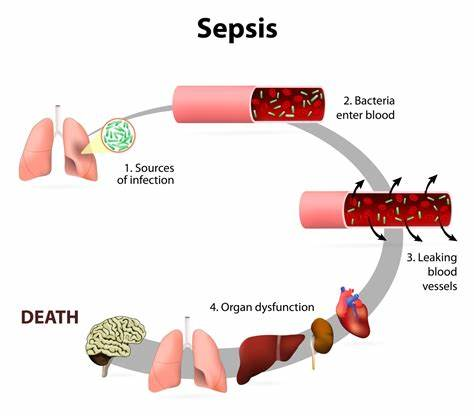

In [2]:
1

1

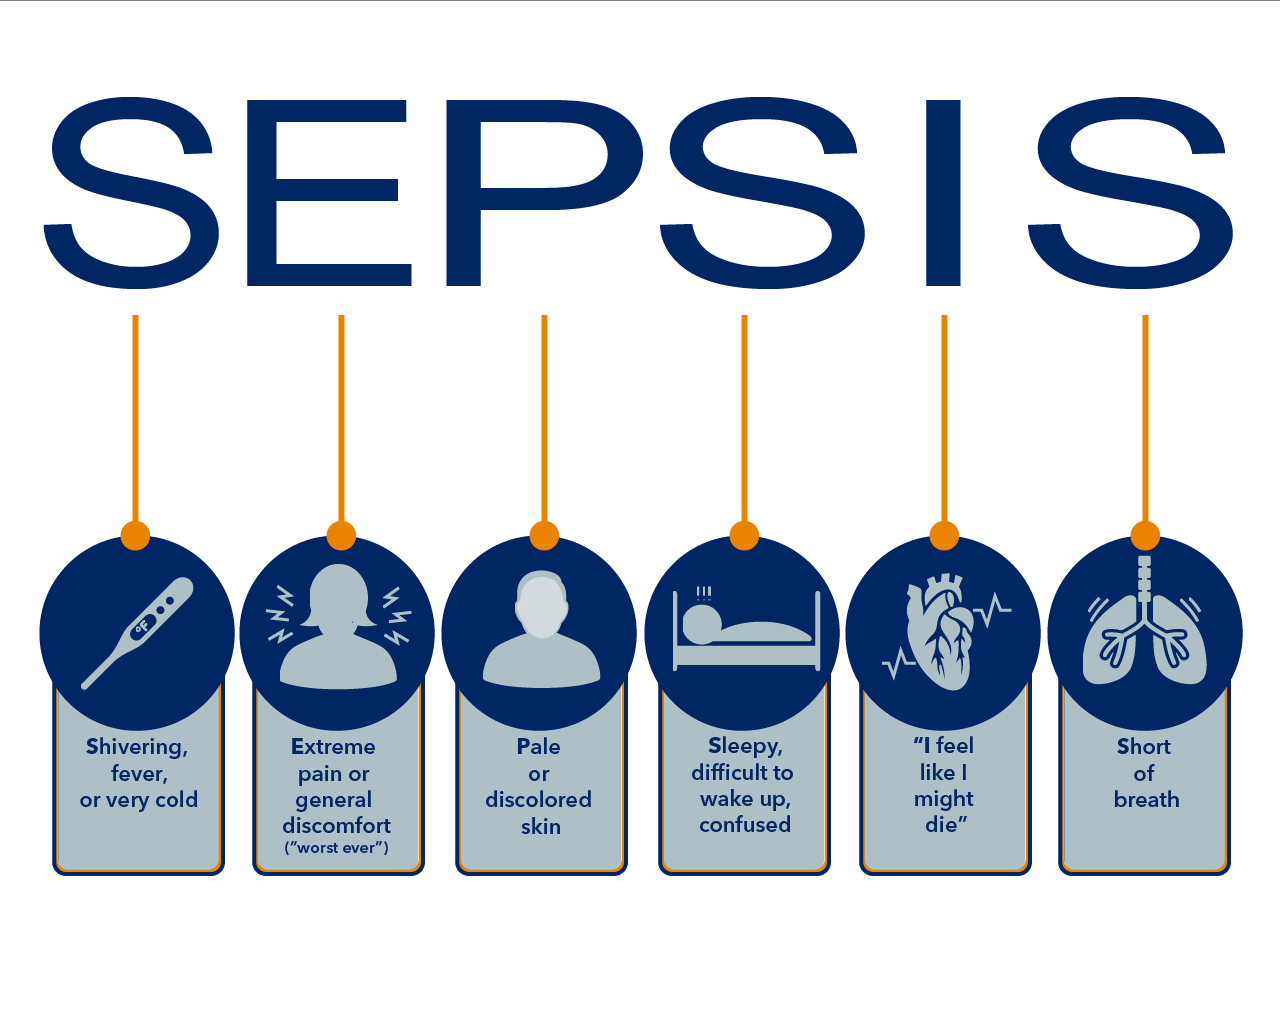

In [1]:
'''
Sepsis is an organ failure disease caused by an infection resulting in extremely high mortality.

Sepsis is a serious condition in which the body responds improperly to an infection.

The infection-fighting processes turn on the body, causing the organs to work poorly.

Sepsis may progress to septic shock. This is a dramatic drop in blood pressure that 
can damage the lungs,kidneys, liver and other vital organs. 

When the damage is severe, it can lead to mortality. 
'''

'\nSepsis is an organ failure disease caused by an infection resulting in extremely high mortality.\n\nSepsis is a serious condition in which the body responds improperly to an infection.\n\nThe infection-fighting processes turn on the body, causing the organs to work poorly.\n\nSepsis may progress to septic shock. This is a dramatic drop in blood pressure that \ncan damage the lungs,kidneys, liver and other vital organs. \n\nWhen the damage is severe, it can lead to mortality. \n'

In [2]:
'''
sepsis refers to an out-of-control body reaction caused by infection
Sepsis can progress to septic shock when certain changes in the circulatory system,

the body's cell and how the body uses energy become more abnormal.
Septic shock is more likely to cause death than sepsis is.

In 2017, there were 48.9 million sepsis cases worldwide, of which 11 million died of 
infection, and the mortality rate was as high as 20%. 
'''

"\nsepsis refers to an out-of-control body reaction caused by infection\nSepsis can progress to septic shock when certain changes in the circulatory system,\n\nthe body's cell and how the body uses energy become more abnormal.\nSeptic shock is more likely to cause death than sepsis is.\n\nIn 2017, there were 48.9 million sepsis cases worldwide, of which 11 million died of \ninfection, and the mortality rate was as high as 20%. \n"

In [3]:
'''
Sepsis is a clinical syndrome of life-threating organ dysfunction caused by a dysregulated response
to infection. In septic shock, there is critical reduction in tissue perfusion; acute failures
in multiple organs, including lungs, kidneys and liver can occur.
'''

'\nSepsis is a clinical syndrome of life-threating organ dysfunction caused by a dysregulated response\nto infection. In septic shock, there is critical reduction in tissue perfusion; acute failures\nin multiple organs, including lungs, kidneys and liver can occur.\n'

In [4]:
"""In intensive care, early recognition of the sepsis risk is essential to control the disease,

because the treatment of sepsis is highly time-sensitive. 

According to the International 
Medical Guidelines, it is recommended to start early fluid resuscitation within the 
first 3 hours to stabilize tissue hypoperfusion induced by sepsis, and it is recommended 
to start intravenous antibacterial agents as early as possible, especially within 1 hour 
after sepsis. 

Actually, every hour of delay in treatment will increase the mortality rate
by about 4–8%. In order to grasp the “golden period” of controlling disease progression

ABG Machine...

Transcutneous blood gas monitor-- contineous reporting of blood related parameters
(non invasive process)

"""

'In intensive care, early recognition of the sepsis risk is essential to control the disease,\n\nbecause the treatment of sepsis is highly time-sensitive. \n\nAccording to the International \nMedical Guidelines, it is recommended to start early fluid resuscitation within the \nfirst 3 hours to stabilize tissue hypoperfusion induced by sepsis, and it is recommended \nto start intravenous antibacterial agents as early as possible, especially within 1 hour \nafter sepsis. \n\nActually, every hour of delay in treatment will increase the mortality rate\nby about 4–8%. In order to grasp the “golden period” of controlling disease progression\n\nABG Machine...\n\nTranscutneous blood gas monitor-- contineous reporting of blood related parameters\n(non invasive process)\n\n'

Rule-based sepsis scoring systems are usually used in clinical settings, 
including 

-->systemic inflammatory response syndrome (SIRS) criteria, 
-->sequential organ failure assessment (SOFA) scores, and 
-->modified early warning score (MEWS), 

to alert the possible occurrence of sepsis.

In [10]:
"""
The main challenges :-
    
in order to predict sepsis in advance, it is also crucial to choose 
appropriate variables and design valuable algorithms in the clinical setting.

The input variables of the model are physiological indicators and the output 
variable is whether the patient would suffer from sepsis several hours later. 

Specifically, the input variables generally include vital signs like heart rate, 
oxygen saturation, and body temperature; biomarkers like procalcitonin and 
interleukin-6; laboratory values like bicarbonate and creatinine; and demographic 
variables like sex and age. 

In most cases, the variables include lots of missing values, such as that in 
MIMIC III (Intensive Care Medical Information Market Database), which has been used in 
many studies. Among most researches, variables with lots of missing values are excluded 
from predictors, so valuable information may be lost as a result. 

Several studies use imputation and mean filling methods to fill in missing values, 
but this may also lead to selection bias or mixtures of confounding factors. 
The data preprocessing method needs to be considered according to the characteristics 
of different data sets.
"""

'\nThe main challenges :-\n    \nin order to predict sepsis in advance, it is also crucial to choose \nappropriate variables and design valuable algorithms in the clinical setting.\n\nThe input variables of the model are physiological indicators and the output \nvariable is whether the patient would suffer from sepsis several hours later. \n\nSpecifically, the input variables generally include vital signs like heart rate, \noxygen saturation, and body temperature; biomarkers like procalcitonin and \ninterleukin-6; laboratory values like bicarbonate and creatinine; and demographic \nvariables like sex and age. \n\nIn most cases, the variables include lots of missing values, such as that in \nMIMIC III (Intensive Care Medical Information Market Database), which has been used in \nmany studies. Among most researches, variables with lots of missing values are excluded \nfrom predictors, so valuable information may be lost as a result. \n\nSeveral studies use imputation and mean filling met

In [11]:
# lets import the basic libraries

In [12]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [13]:
# to see the large no. of columns/rows
pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",200)

In [15]:
# read the dataset
df=pd.read_csv("sepsis_status.csv")
dictionary=pd.read_csv("Parameter _detail_Dictionary.csv")

In [16]:
icu_df=df.copy()
icu_df.head()

encounter_id  patient_id  hospital_id  septic_shock   age    bmi  \
0         66154       25312          118             0  68.0  22.73   
1        114252       59342           81             0  77.0  27.42   
2        119783       50777          118             0  25.0  31.95   
3         79267       46918          118             0  81.0  22.64   
4         92056       34377           33             0  19.0    NaN   

   elective_surgery  ethnicity gender  height hospital_admit_source  \
0                 0  Caucasian      M   180.3                 Floor   
1                 0  Caucasian      F   160.0                 Floor   
2                 0  Caucasian      F   172.7  Emergency Department   
3                 1  Caucasian      F   165.1        Operating Room   
4                 0  Caucasian      M   188.0                   NaN   

            icu_admit_source  icu_id icu_stay_type      icu_type  \
0                      Floor      92         admit         CTICU   
1                      Floor      90         admit  Med-Surg ICU   
2       Accident & Emergency      93         admit  Med-Surg ICU   
3  Operating Room / Recovery      92         admit         CTICU   
4       Accident & Emergency      91         admit  Med-Surg ICU   

   pre_icu_los_days  readmission_status  weight  albumin_apache  \
0          0.541667                   0    73.9             2.3   
1          0.927778                   0    70.2             NaN   
2          0.000694                   0    95.3             NaN   
3          0.000694                   0    61.7             NaN   
4          0.073611                   0     NaN             NaN   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               113.0               502.01                      0         0.0   
1               108.0               203.01                      0         0.0   
2               122.0               703.03                      0         0.0   
3               203.0              1206.03                      1         0.0   
4               119.0               601.01                      0         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
0               0.4        31.0               2.51          NaN   
1               NaN         9.0               0.56          1.0   
2               NaN         NaN                NaN          NaN   
3               NaN         NaN                NaN          0.6   
4               NaN         NaN                NaN          NaN   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.0               3.0                0.0                1.0   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              NaN               NaN                NaN                NaN   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           168.0              118.0               27.4               0.0   
1           145.0              120.0               36.9               0.0   
2             NaN              102.0                NaN               0.0   
3           185.0              114.0               25.9               1.0   
4             NaN               60.0                NaN               0.0   

   map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  \
0        40.0           NaN                  NaN          NaN        NaN   
1        46.0          37.0                 37.0         51.0       7.45   
2        68.0           NaN                  NaN          NaN        NaN   
3        60.0          30.0                 30.0        142.0       7.39   
4       103.0           NaN                  NaN          NaN        NaN   

   resprate_apache  sodium_apache  temp_apache  urineoutpu

In [17]:
icu_df.shape

(91713, 186)

In [18]:
# information about the features
icu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [19]:
icu_df["ethnicity"].value_counts()

Caucasian           70684
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: ethnicity, dtype: int64

In [20]:
icu_df["septic_shock"].value_counts()

0    83798
1     7915
Name: septic_shock, dtype: int64

In [21]:
icu_df["septic_shock"].value_counts(normalize=True)

0    0.913698
1    0.086302
Name: septic_shock, dtype: float64

In [22]:
# let find the detail of parameters

In [23]:
dictionary

Category                   Variable Name  \
0                   identifier                    encounter_id   
1                   identifier                     hospital_id   
2                   identifier                      patient_id   
3                  demographic                   Sepsis_status   
4                  demographic                             age   
5                  demographic                             bmi   
6                  demographic                elective_surgery   
7                  demographic                       ethnicity   
8                  demographic                          gender   
9                  demographic                          height   
10                 demographic           hospital_admit_source   
11                 demographic                icu_admit_source   
12                 demographic                  icu_admit_type   
13                 demographic                          icu_id   
14                 demographic                   icu_stay_type   
15                 demographic                        icu_type   
16                 demographic                pre_icu_los_days   
17                 demographic              readmission_status   
18                 demographic                          weight   
19            APACHE covariate                  albumin_apache   
20            APACHE covariate              apache_2_diagnosis   
21            APACHE covariate             apache_3j_diagnosis   
22            APACHE covariate           apache_post_operative   
23            APACHE covariate                      arf_apache   
24            APACHE covariate                bilirubin_apache   
25            APACHE covariate                      bun_apache   
26            APACHE covariate               creatinine_apache   
27            APACHE covariate                     fio2_apache   
28            APACHE covariate                 gcs_eyes_apache   
29            APACHE covariate                gcs_motor_apache   
30            APACHE covariate               gcs_unable_apache   
31            APACHE covariate               gcs_verbal_apache   
32            APACHE covariate                  glucose_apache   
33            APACHE covariate               heart_rate_apache   
34            APACHE covariate               hematocrit_apache   
35            APACHE covariate                intubated_apache   
36            APACHE covariate                      map_apache   
37            APACHE covariate                    paco2_apache   
38            APACHE covariate             paco2_for_ph_apache   
39            APACHE covariate                     pao2_apache   
40            APACHE covariate                       ph_apache   
41            APACHE covariate                 resprate_apache   
42            APACHE covariate                   sodium_apache   
43            APACHE covariate                     temp_apache   
44            APACHE covariate              urineoutput_apache   
45            APACHE covariate               ventilated_apache   
46            APACHE covariate                      wbc_apache   
47                      vitals          d1_diasbp_invasive_max   
48                      vitals          d1_diasbp_invasive_min   
49                      vitals                   d1_diasbp_max   
50                      vitals                   d1_diasbp_min   
51                      vitals       d1_diasbp_noninvasive_max   
52                      vitals       d1_diasbp_noninvasive_min   
53                      vitals                d1_heartrate_max   
54                      vitals                d1_heartrate_min   
55                      vitals             d1_mbp_invasive_max   
56                      vitals             d1_mbp_invasive_min   
57                      vitals                      d1_mbp_max   
58                      vitals                      d1_mbp_min   
59                      vitals          d1_mbp_noninvasive_max

In [24]:
dictionary["Description"][17]

'Whether the current unit stay is the second (or greater) stay at an ICU within the same hospitalization'

In [25]:
dictionary["Description"][19]

'The albumin concentration measured during the first 24 hours which results in the highest APACHE III score'

In [26]:
dictionary["Description"][25]

'The blood urea nitrogen concentration measured during the first 24 hours which results in the highest APACHE III score'

In [28]:
# we can create a basic function to see the detail of a particular group also 
def select_category(data,category):
    return data[data.Category==category]

In [29]:
cols=select_category(dictionary,"APACHE comorbidity")
cols

Category                Variable Name Unit of Measure  \
177  APACHE comorbidity                         aids            None   
178  APACHE comorbidity                    cirrhosis            None   
179  APACHE comorbidity            diabetes_mellitus            None   
180  APACHE comorbidity              hepatic_failure            None   
181  APACHE comorbidity            immunosuppression            None   
182  APACHE comorbidity                     leukemia            None   
183  APACHE comorbidity                     lymphoma            None   
184  APACHE comorbidity  solid_tumor_with_metastasis            None   

    Data Type                                        Description Example  
177    binary  Whether the patient has a definitive diagnosis...       1  
178    binary  Whether the patient has a history of heavy alc...       1  
179    binary  Whether the patient has been diagnosed with di...       1  
180    binary  Whether the patient has cirrhosis and addition...       1  
181    binary  Whether the patient has their immune system su...       1  
182    binary  Whether the patient has been diagnosed with ac...       1  
183    binary  Whether the patient has been diagnosed with no...       1  
184    binary  Whether the patient has been diagnosed with an...       1

In [30]:
# Lets concentrate on the icu_df dataset .. try to make some prediction as a DS.

In [31]:
# PREPROCESSING --- MISSING VALUE

In [32]:
icu_df.isnull().sum()

encounter_id                          0
patient_id                            0
hospital_id                           0
septic_shock                          0
age                                4228
bmi                                3429
elective_surgery                      0
ethnicity                          1395
gender                               25
height                             1334
hospital_admit_source             21409
icu_admit_source                    112
icu_id                                0
icu_stay_type                         0
icu_type                              0
pre_icu_los_days                      0
readmission_status                    0
weight                             2720
albumin_apache                    54379
apache_2_diagnosis                 1662
apache_3j_diagnosis                1101
apache_post_operative                 0
arf_apache                          715
bilirubin_apache                  58134
bun_apache                        19262


In [33]:
# evaluatiion of the missing value
high_null=icu_df.isnull().sum()/len(icu_df)


In [34]:
#sorting the missing value as decending order
high_null.sort_values(ascending=False)

h1_bilirubin_min                  0.922650
h1_bilirubin_max                  0.922650
h1_lactate_max                    0.919924
h1_lactate_min                    0.919924
h1_albumin_max                    0.913982
h1_albumin_min                    0.913982
h1_pao2fio2ratio_min              0.874413
h1_pao2fio2ratio_max              0.874413
h1_arterial_ph_max                0.833295
h1_arterial_ph_min                0.833295
h1_hco3_max                       0.829697
h1_hco3_min                       0.829697
h1_arterial_pco2_min              0.828225
h1_arterial_pco2_max              0.828225
h1_wbc_max                        0.828160
h1_wbc_min                        0.828160
h1_arterial_po2_max               0.828072
h1_arterial_po2_min               0.828072
h1_calcium_max                    0.827178
h1_calcium_min                    0.827178
h1_platelets_max                  0.825107
h1_platelets_min                  0.825107
h1_bun_max                        0.818761
h1_bun_min 

In [ ]:
# we have either more than 50% missing value or less than 25% missing value
# approach -- drop the columns having more than 50% missing value
# drop the rows having misisng values 

In [35]:
# identify the columns having more than 50% missing value
high_missing=high_null[high_null>0.50].index
high_missing

Index(['albumin_apache', 'bilirubin_apache', 'fio2_apache', 'paco2_apache',
       'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'urineoutput_apache',
       'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_sysbp_invasive_max',
       'd1_sysbp_invasive_min', 'h1_diasbp_invasive_max',
       'h1_diasbp_invasive_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min',
       'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'd1_albumin_max',
       'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_inr_max',
       'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'h1_albumin_max',
       'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max',
       'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max',
       'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max',
       'h1_hco3_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min',
       'h1_hematocrit_max', 'h1_hematocri

In [36]:
# length of the columns 
len(high_missing)

74

In [37]:
# dropping these columns
icu=icu_df.drop(high_missing,axis=1)

In [38]:
icu_df.shape

(91713, 186)

In [39]:
icu.shape

(91713, 112)

In [40]:
icu.isnull().sum()

encounter_id                          0
patient_id                            0
hospital_id                           0
septic_shock                          0
age                                4228
bmi                                3429
elective_surgery                      0
ethnicity                          1395
gender                               25
height                             1334
hospital_admit_source             21409
icu_admit_source                    112
icu_id                                0
icu_stay_type                         0
icu_type                              0
pre_icu_los_days                      0
readmission_status                    0
weight                             2720
apache_2_diagnosis                 1662
apache_3j_diagnosis                1101
apache_post_operative                 0
arf_apache                          715
bun_apache                        19262
creatinine_apache                 18853
gcs_eyes_apache                    1901


In [41]:
# the rest of the missing values are less than 25% we will drop the rows
df1=icu.dropna()
df1.shape

(27795, 112)

In [42]:
df1.head()

encounter_id  patient_id  hospital_id  septic_shock   age        bmi  \
0          66154       25312          118             0  68.0  22.730000   
1         114252       59342           81             0  77.0  27.420000   
5          33181       74489           83             0  67.0  27.560000   
17         22471      112115          118             0  46.0  25.845717   
23         95460      120539          118             0  87.0  21.963763   

    elective_surgery  ethnicity gender  height hospital_admit_source  \
0                  0  Caucasian      M   180.3                 Floor   
1                  0  Caucasian      F   160.0                 Floor   
5                  0  Caucasian      M   190.5          Direct Admit   
17                 0   Hispanic      M   167.6  Emergency Department   
23                 0  Caucasian      M   180.3                 Floor   

        icu_admit_source  icu_id icu_stay_type      icu_type  \
0                  Floor      92         admit         CTICU   
1                  Floor      90         admit  Med-Surg ICU   
5   Accident & Emergency      95         admit  Med-Surg ICU   
17  Accident & Emergency      92         admit         CTICU   
23                 Floor      97         admit          MICU   

    pre_icu_los_days  readmission_status  weight  apache_2_diagnosis  \
0           0.541667                   0    73.9               113.0   
1           0.927778                   0    70.2               108.0   
5           0.000694                   0   100.0               301.0   
17          0.000000                   0    72.6               108.0   
23          5.046528                   0    71.4               113.0   

    apache_3j_diagnosis  apache_post_operative  arf_apache  bun_apache  \
0                502.01                      0         0.0        31.0   
1                203.01                      0         0.0         9.0   
5                403.01                      0         0.0        13.0   
17               203.01                      0         0.0        15.0   
23               501.05                      0         0.0        13.0   

    creatinine_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
0                2.51              3.0               6.0                0.0   
1                0.56              1.0               3.0                0.0   
5                0.71              4.0               6.0                0.0   
17               1.00              1.0               4.0                0.0   
23               0.94              3.0               6.0                0.0   

    gcs_verbal_apache  glucose_apache  heart_rate_apache  hematocrit_apache  \
0                 4.0           168.0              118.0               27.4   
1                 1.0           145.0              120.0               36.9   
5                 5.0           156.0              113.0               44.2   
17                1.0           143.0              114.0               44.2   
23                1.0           105.0               99.0               28.9   

    intubated_apache  map_apache  resprate_apache  sodium_apache  temp_apache  \
0                0.0        40.0             36.0          134.0         39.3   
1                0.0        46.0             33.0          145.0         35.1   
5                0.0       130.0             35.0          137.0         36.6   
17               1.0       113.0             34.0          132.0         36.4   
23               0.0       133.0             33.0          146.0         36.3   

    ventilated_apache  wbc_apache  d1_diasbp_max  d1_diasbp_min  \
0                 0.0        14.1           68.0           37.0   
1                 1.0        12.7           95.0           31.0   
5                 0.0        10.9          100.0           61.0   
17                1.0         9.7           89.0           61.0   
23                1.0         9.9           88.0           65.0   

    d1_dias

In [ ]:
# most of the cases the ID columns has no impact in the prediction 
# important:- we will the hospital_id and int indicate the facilities available in the associated hospital

In [43]:
columns_to_drop=["encounter_id","patient_id","hospital_admit_source","icu_admit_source","icu_id","icu_stay_type"]

In [44]:
columns_to_drop

['encounter_id',
 'patient_id',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type']

In [45]:
df1=df1.drop(columns_to_drop,axis=1)
df1.shape

(27795, 106)

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27795 entries, 0 to 91709
Columns: 106 entries, hospital_id to apache_2_bodysystem
dtypes: float64(96), int64(5), object(5)
memory usage: 22.7+ MB


In [47]:
#lets find the object columns
object_columns=df1.select_dtypes(include="object").columns
object_columns

Index(['ethnicity', 'gender', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [48]:
df1["icu_type"].value_counts()

Med-Surg ICU    14518
MICU             2826
Neuro ICU        2497
CCU-CTICU        2246
SICU             1866
CSICU            1649
Cardiac ICU      1343
CTICU             850
Name: icu_type, dtype: int64

In [49]:
df1["apache_3j_bodysystem"].value_counts()

Cardiovascular          8460
Sepsis                  3962
Neurological            3686
Respiratory             3666
Gastrointestinal        3057
Metabolic               2270
Trauma                  1339
Genitourinary            684
Musculoskeletal/Skin     360
Hematological            207
Gynecological            104
Name: apache_3j_bodysystem, dtype: int64

In [50]:
# convert the categorical variable to numeric 

In [51]:
df2=pd.get_dummies(df1,columns=object_columns,drop_first=True)

In [52]:
df2.shape

(27795, 133)

In [53]:
df2.head()

hospital_id  septic_shock   age        bmi  elective_surgery  height  \
0           118             0  68.0  22.730000                 0   180.3   
1            81             0  77.0  27.420000                 0   160.0   
5            83             0  67.0  27.560000                 0   190.5   
17          118             0  46.0  25.845717                 0   167.6   
23          118             0  87.0  21.963763                 0   180.3   

    pre_icu_los_days  readmission_status  weight  apache_2_diagnosis  \
0           0.541667                   0    73.9               113.0   
1           0.927778                   0    70.2               108.0   
5           0.000694                   0   100.0               301.0   
17          0.000000                   0    72.6               108.0   
23          5.046528                   0    71.4               113.0   

    apache_3j_diagnosis  apache_post_operative  arf_apache  bun_apache  \
0                502.01                      0         0.0        31.0   
1                203.01                      0         0.0         9.0   
5                403.01                      0         0.0        13.0   
17               203.01                      0         0.0        15.0   
23               501.05                      0         0.0        13.0   

    creatinine_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
0                2.51              3.0               6.0                0.0   
1                0.56              1.0               3.0                0.0   
5                0.71              4.0               6.0                0.0   
17               1.00              1.0               4.0                0.0   
23               0.94              3.0               6.0                0.0   

    gcs_verbal_apache  glucose_apache  heart_rate_apache  hematocrit_apache  \
0                 4.0           168.0              118.0               27.4   
1                 1.0           145.0              120.0               36.9   
5                 5.0           156.0              113.0               44.2   
17                1.0           143.0              114.0               44.2   
23                1.0           105.0               99.0               28.9   

    intubated_apache  map_apache  resprate_apache  sodium_apache  temp_apache  \
0                0.0        40.0             36.0          134.0         39.3   
1                0.0        46.0             33.0          145.0         35.1   
5                0.0       130.0             35.0          137.0         36.6   
17               1.0       113.0             34.0          132.0         36.4   
23               0.0       133.0             33.0          146.0         36.3   

    ventilated_apache  wbc_apache  d1_diasbp_max  d1_diasbp_min  \
0                 0.0        14.1           68.0           37.0   
1                 1.0        12.7           95.0           31.0   
5                 0.0        10.9          100.0           61.0   
17                1.0         9.7           89.0           61.0   
23                1.0         9.9           88.0           65.0   

    d1_diasbp_noninvasive_max  d1_diasbp_noninvasive_min  d1_heartrate_max  \
0                        68.0                       37.0             119.0   
1                        95.0                       31.0             118.0   
5                       100.0                       61.0             113.0   
17                       89.0                       61.0              98.0   
23                       88.0                       65.0             116.0   

    d1_heartrate_min  d1_mbp_max  d1_mbp_min  d1_mbp_noninvasive_max  \
0               72.0        89.0        46.0                    89.0   
1               72.0       120.0        38.0                   120.0   
5               83.0       127.0        80.0                   127.0   
17              64.0       113.0        76.0                   113.0   


In [54]:
# EDA

In [55]:
#PIE PLOT

In [56]:
XYZ=df2["septic_shock"].value_counts(normalize=True)
XYZ

0    0.908761
1    0.091239
Name: septic_shock, dtype: float64

In [57]:
XYZ.index

Int64Index([0, 1], dtype='int64')

In [58]:
XYZ.values

array([0.90876057, 0.09123943])

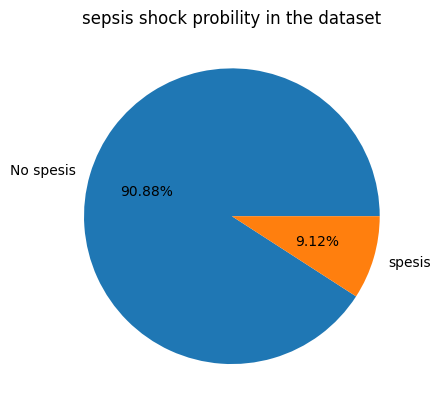

In [59]:
plt.pie(df2["septic_shock"].value_counts(normalize=True),labels=("No spesis","spesis"),autopct="%1.2f%%")
plt.title("sepsis shock probility in the dataset")
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

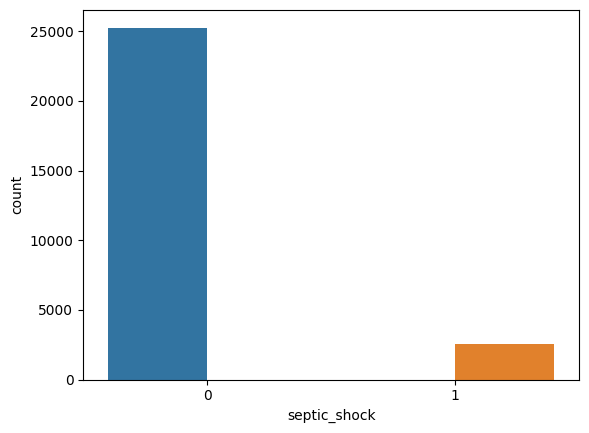

In [60]:
sns.countplot(x="septic_shock",data=df2,hue="septic_shock")

<Axes: xlabel='septic_shock', ylabel='count'>

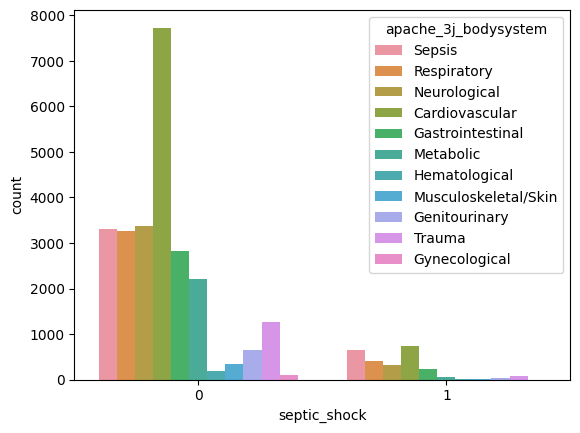

In [61]:
sns.countplot(x="septic_shock",data=df1,hue="apache_3j_bodysystem")

<Axes: xlabel='septic_shock', ylabel='count'>

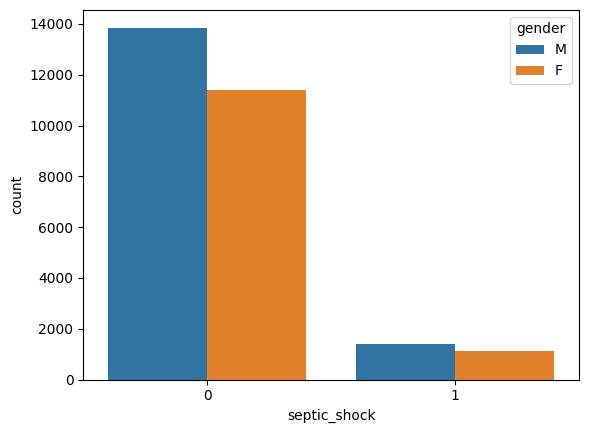

In [62]:
sns.countplot(x="septic_shock",data=df1,hue="gender")

AttributeError: 'numpy.float64' object has no attribute 'startswith'

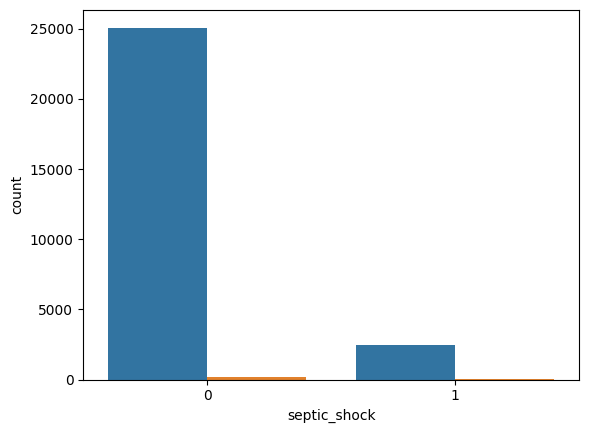

In [63]:
sns.countplot(x="septic_shock",data=df1,hue="leukemia")

In [64]:
# model building process
# split the data dep and independent variable

In [65]:
X=df2.drop("septic_shock",axis=1)
Y=df2["septic_shock"]

In [66]:
# any column having just one unique variabe
one_unique=X.apply(pd.Series.nunique)
one_unique

hospital_id                                    119
age                                             74
bmi                                          16993
elective_surgery                                 2
height                                         271
pre_icu_los_days                              4637
readmission_status                               1
weight                                        2447
apache_2_diagnosis                              44
apache_3j_diagnosis                            363
apache_post_operative                            2
arf_apache                                       2
bun_apache                                     195
creatinine_apache                              938
gcs_eyes_apache                                  4
gcs_motor_apache                                 6
gcs_unable_apache                                1
gcs_verbal_apache                                5
glucose_apache                                 534
heart_rate_apache              

In [67]:
const_cols=one_unique[(one_unique==1)].index

In [68]:
const_cols

Index(['readmission_status', 'gcs_unable_apache'], dtype='object')

In [70]:
Const_col=[]
for i in df2:
    if df2[i].nunique()==1:
        Const_col.append(i)

In [72]:
Const_col

['readmission_status', 'gcs_unable_apache']

In [73]:
X=X.drop(const_cols,axis=1)

In [74]:
X.shape

(27795, 130)

In [75]:
# find the multicollinearity 
corr_matrix100=df2.corr(method="spearman")
corr_matrix100

hospital_id  septic_shock  \
hospital_id                                   1.000000      0.002286   
septic_shock                                  0.002286      1.000000   
age                                          -0.023046      0.099427   
bmi                                           0.014703     -0.036218   
elective_surgery                              0.049647     -0.091100   
height                                        0.033495     -0.006156   
pre_icu_los_days                             -0.000866      0.006528   
readmission_status                                 NaN           NaN   
weight                                        0.027434     -0.034983   
apache_2_diagnosis                            0.005550     -0.097688   
apache_3j_diagnosis                           0.017585     -0.102893   
apache_post_operative                         0.047964     -0.084014   
arf_apache                                    0.000385      0.032228   
bun_apache                                   -0.008449      0.199844   
creatinine_apache                             0.013198      0.168736   
gcs_eyes_apache                              -0.026168     -0.226057   
gcs_motor_apache                             -0.013921     -0.257590   
gcs_unable_apache                                  NaN           NaN   
gcs_verbal_apache                            -0.009046     -0.235668   
glucose_apache                               -0.007863      0.060944   
heart_rate_apache                            -0.001770      0.120397   
hematocrit_apache                            -0.000898     -0.073562   
intubated_apache                              0.016270      0.204445   
map_apache                                   -0.012759     -0.078902   
resprate_apache                              -0.054585      0.103064   
sodium_apache                                 0.003439     -0.019614   
temp_apache                                  -0.059842     -0.112352   
ventilated_apache                             0.034473      0.228291   
wbc_apache                                    0.019394      0.111372   
d1_diasbp_max                                 0.012832      0.005286   
d1_diasbp_min                                -0.015559     -0.156245   
d1_diasbp_noninvasive_max                     0.012855      0.005023   
d1_diasbp_noninvasive_min                    -0.015755     -0.155884   
d1_heartrate_max                              0.019620      0.143503   
d1_heartrate_min                             -0.014032      0.040902   
d1_mbp_max                                    0.005818     -0.006497   
d1_mbp_min                                   -0.030437     -0.175971   
d1_mbp_noninvasive_max                        0.006060     -0.007811   
d1_mbp_noninvasive_min                       -0.030315     -0.175671   
d1_resprate_max                               0.014507      0.133271   
d1_resprate_min                              -0.083630      0.060949   
d1_spo2_max                                   0.025829      0.058143   
d1_spo2_min                                  -0.033792     -0.129779   
d1_sysbp_max                                 -0.009972     -0.025629   
d1_sysbp_min                                 -0.029607     -0.191802   
d1_sysbp_noninvasive_max                     -0.009554     -0.026061   
d1_sysbp_noninvasive_min                     -0.029469     -0.191440   
d1_temp_max                                   0.034897      0.029744   
d1_temp_min                                  -0.080696     -0.124884   
h1_diasbp_max                                 0.019332     -0.032307   
h1_diasbp_min                                -0.025912     -0.109101   
h1_diasbp_noninvasive_max                     0.019883     -0.032493   
h1_diasbp_noninvasive_min                    -0.022735     -0.109729   
h1_heartrate_max                              0.004763      0.097762   
h1_heartrate_min                             -0.022250      0.077967   
h1_mbp_max 

In [76]:
# find the multicollinearity 
corr_matrix=X.corr(method="spearman")
corr_matrix

hospital_id       age       bmi  \
hospital_id                                   1.000000 -0.023046  0.014703   
age                                          -0.023046  1.000000 -0.102192   
bmi                                           0.014703 -0.102192  1.000000   
elective_surgery                              0.049647  0.054517  0.028267   
height                                        0.033495 -0.123064 -0.012171   
pre_icu_los_days                             -0.000866  0.090182 -0.009129   
weight                                        0.027434 -0.148448  0.880394   
apache_2_diagnosis                            0.005550 -0.035333  0.008191   
apache_3j_diagnosis                           0.017585 -0.088868 -0.033975   
apache_post_operative                         0.047964  0.045835  0.030399   
arf_apache                                    0.000385 -0.019419 -0.004010   
bun_apache                                   -0.008449  0.341147  0.081152   
creatinine_apache                             0.013198  0.206540  0.155061   
gcs_eyes_apache                              -0.026168  0.042142  0.020329   
gcs_motor_apache                             -0.013921  0.035899  0.039773   
gcs_verbal_apache                            -0.009046 -0.021180  0.053836   
glucose_apache                               -0.007863  0.045058  0.150083   
heart_rate_apache                            -0.001770 -0.161223 -0.042985   
hematocrit_apache                            -0.000898 -0.121132  0.117249   
intubated_apache                              0.016270 -0.008750  0.036228   
map_apache                                   -0.012759 -0.076555  0.053504   
resprate_apache                              -0.054585  0.031430 -0.002553   
sodium_apache                                 0.003439  0.042749 -0.021054   
temp_apache                                  -0.059842 -0.113531  0.037492   
ventilated_apache                             0.034473  0.006724  0.069622   
wbc_apache                                    0.019394 -0.011917  0.054315   
d1_diasbp_max                                 0.012832 -0.073898  0.054502   
d1_diasbp_min                                -0.015559 -0.251466 -0.008948   
d1_diasbp_noninvasive_max                     0.012855 -0.073416  0.054250   
d1_diasbp_noninvasive_min                    -0.015755 -0.251180 -0.009203   
d1_heartrate_max                              0.019620 -0.154576 -0.043471   
d1_heartrate_min                             -0.014032 -0.151041  0.011664   
d1_mbp_max                                    0.005818 -0.014250  0.072978   
d1_mbp_min                                   -0.030437 -0.172263  0.020790   
d1_mbp_noninvasive_max                        0.006060 -0.014217  0.072847   
d1_mbp_noninvasive_min                       -0.030315 -0.172481  0.020615   
d1_resprate_max                               0.014507  0.031633  0.022875   
d1_resprate_min                              -0.083630  0.051329  0.000331   
d1_spo2_max                                   0.025829 -0.029938 -0.124595   
d1_spo2_min                                  -0.033792 -0.113899 -0.088231   
d1_sysbp_max                                 -0.009972  0.104631  0.095507   
d1_sysbp_min                                 -0.029607 -0.075637  0.059089   
d1_sysbp_noninvasive_max                     -0.009554  0.104315  0.095253   
d1_sysbp_noninvasive_min                     -0.029469 -0.075678  0.058879   
d1_temp_max                                   0.034897 -0.097403  0.019230   
d1_temp_min                                  -0.080696 -0.116708  0.036794   
h1_diasbp_max                                 0.019332 -0.168123  0.032363   
h1_diasbp_min                                -0.025912 -0.216529  0.001410   
h1_diasbp_noninvasive_max                     0.019883 -0.166813  0.030786   
h1_diasbp_noninvasive_min                    -0.022735 -0.216744  0.000757   
h1_heartrate_max                              0.004763 -0.178289 

<function matplotlib.pyplot.show(close=None, block=None)>

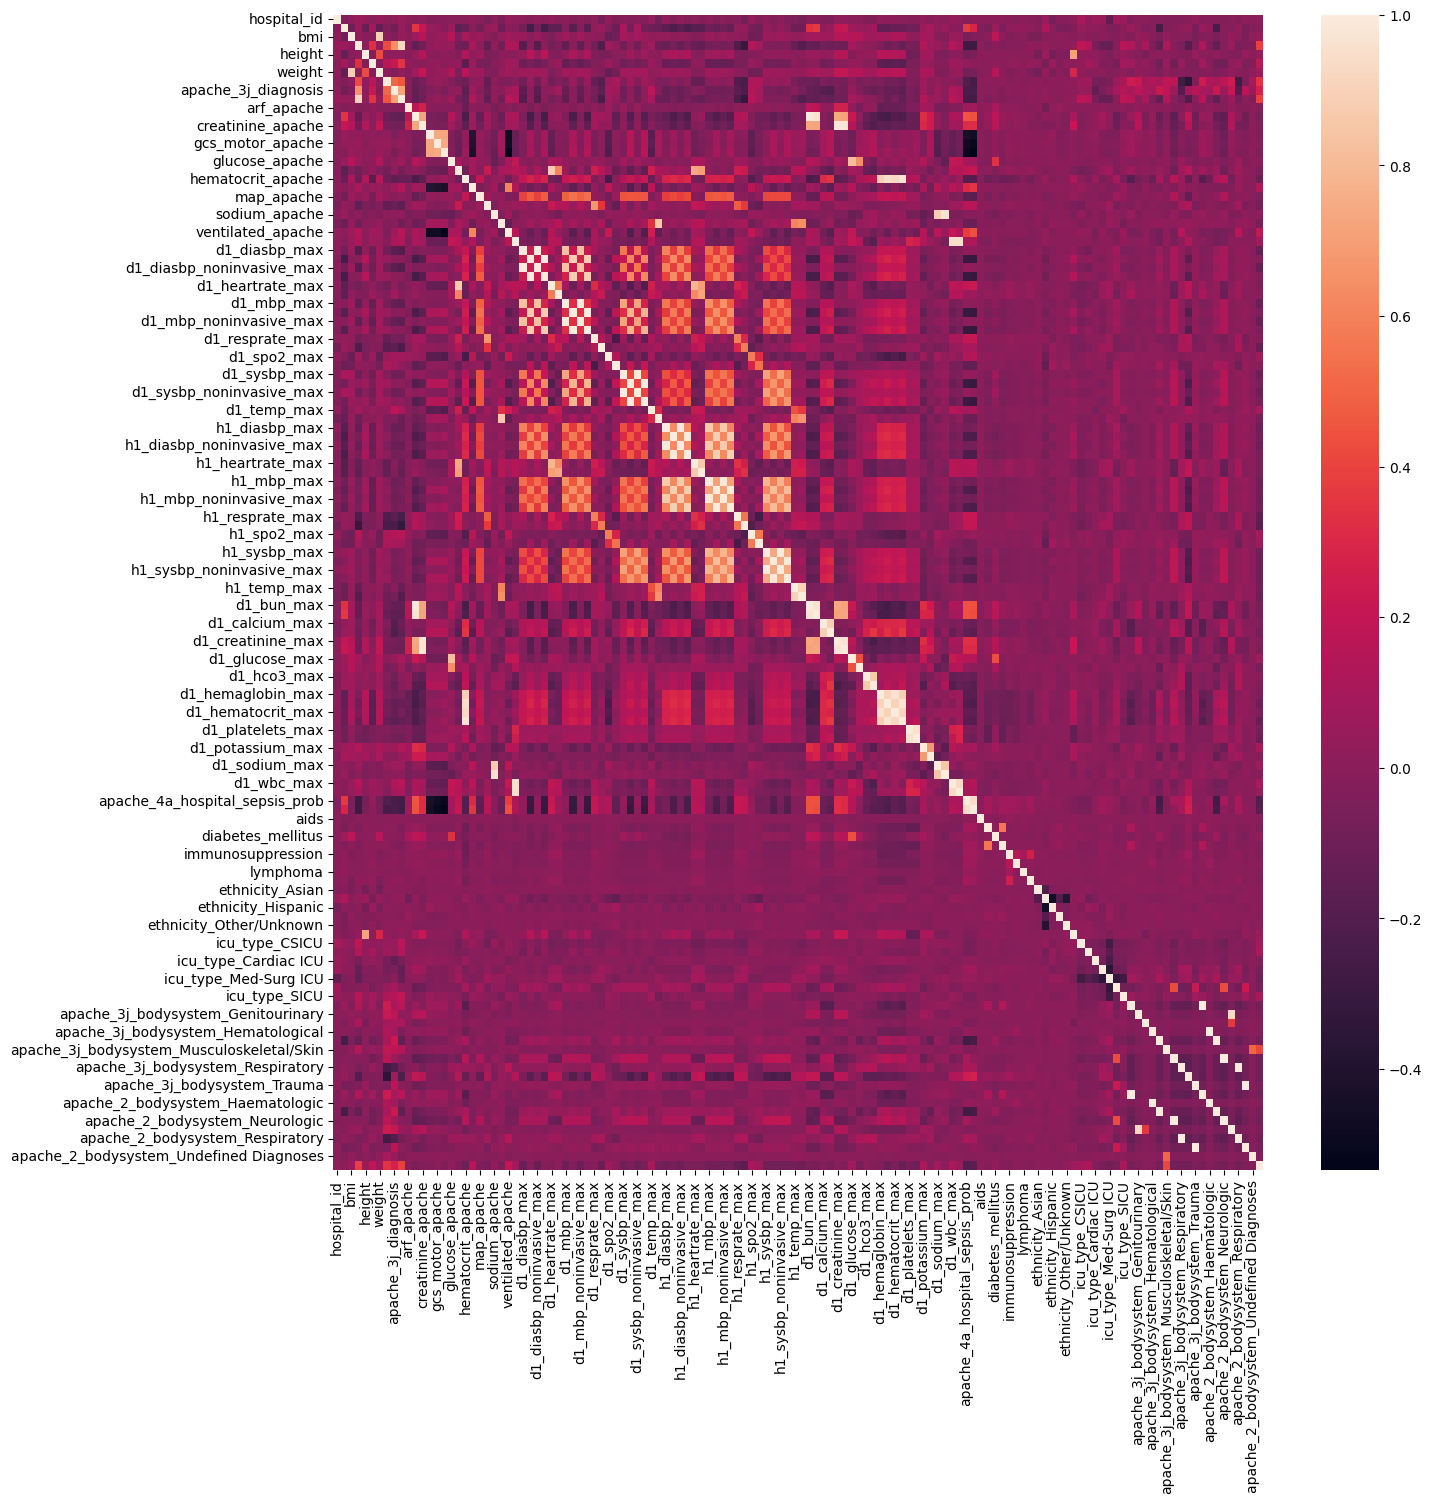

In [77]:
# heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix)
plt.show

In [78]:
# create an upper triangle
#np.triu -- create a metrics for the upper part

upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
upper

hospital_id       age       bmi  \
hospital_id                                        NaN -0.023046  0.014703   
age                                                NaN       NaN -0.102192   
bmi                                                NaN       NaN       NaN   
elective_surgery                                   NaN       NaN       NaN   
height                                             NaN       NaN       NaN   
pre_icu_los_days                                   NaN       NaN       NaN   
weight                                             NaN       NaN       NaN   
apache_2_diagnosis                                 NaN       NaN       NaN   
apache_3j_diagnosis                                NaN       NaN       NaN   
apache_post_operative                              NaN       NaN       NaN   
arf_apache                                         NaN       NaN       NaN   
bun_apache                                         NaN       NaN       NaN   
creatinine_apache                                  NaN       NaN       NaN   
gcs_eyes_apache                                    NaN       NaN       NaN   
gcs_motor_apache                                   NaN       NaN       NaN   
gcs_verbal_apache                                  NaN       NaN       NaN   
glucose_apache                                     NaN       NaN       NaN   
heart_rate_apache                                  NaN       NaN       NaN   
hematocrit_apache                                  NaN       NaN       NaN   
intubated_apache                                   NaN       NaN       NaN   
map_apache                                         NaN       NaN       NaN   
resprate_apache                                    NaN       NaN       NaN   
sodium_apache                                      NaN       NaN       NaN   
temp_apache                                        NaN       NaN       NaN   
ventilated_apache                                  NaN       NaN       NaN   
wbc_apache                                         NaN       NaN       NaN   
d1_diasbp_max                                      NaN       NaN       NaN   
d1_diasbp_min                                      NaN       NaN       NaN   
d1_diasbp_noninvasive_max                          NaN       NaN       NaN   
d1_diasbp_noninvasive_min                          NaN       NaN       NaN   
d1_heartrate_max                                   NaN       NaN       NaN   
d1_heartrate_min                                   NaN       NaN       NaN   
d1_mbp_max                                         NaN       NaN       NaN   
d1_mbp_min                                         NaN       NaN       NaN   
d1_mbp_noninvasive_max                             NaN       NaN       NaN   
d1_mbp_noninvasive_min                             NaN       NaN       NaN   
d1_resprate_max                                    NaN       NaN       NaN   
d1_resprate_min                                    NaN       NaN       NaN   
d1_spo2_max                                        NaN       NaN       NaN   
d1_spo2_min                                        NaN       NaN       NaN   
d1_sysbp_max                                       NaN       NaN       NaN   
d1_sysbp_min                                       NaN       NaN       NaN   
d1_sysbp_noninvasive_max                           NaN       NaN       NaN   
d1_sysbp_noninvasive_min                           NaN       NaN       NaN   
d1_temp_max                                        NaN       NaN       NaN   
d1_temp_min                                        NaN       NaN       NaN   
h1_diasbp_max                                      NaN       NaN       NaN   
h1_diasbp_min                                      NaN       NaN       NaN   
h1_diasbp_noninvasive_max                          NaN       NaN       NaN   
h1_diasbp_noninvasive_min                          NaN       NaN       NaN   
h1_heartrate_max                                   NaN       NaN 

<function matplotlib.pyplot.show(close=None, block=None)>

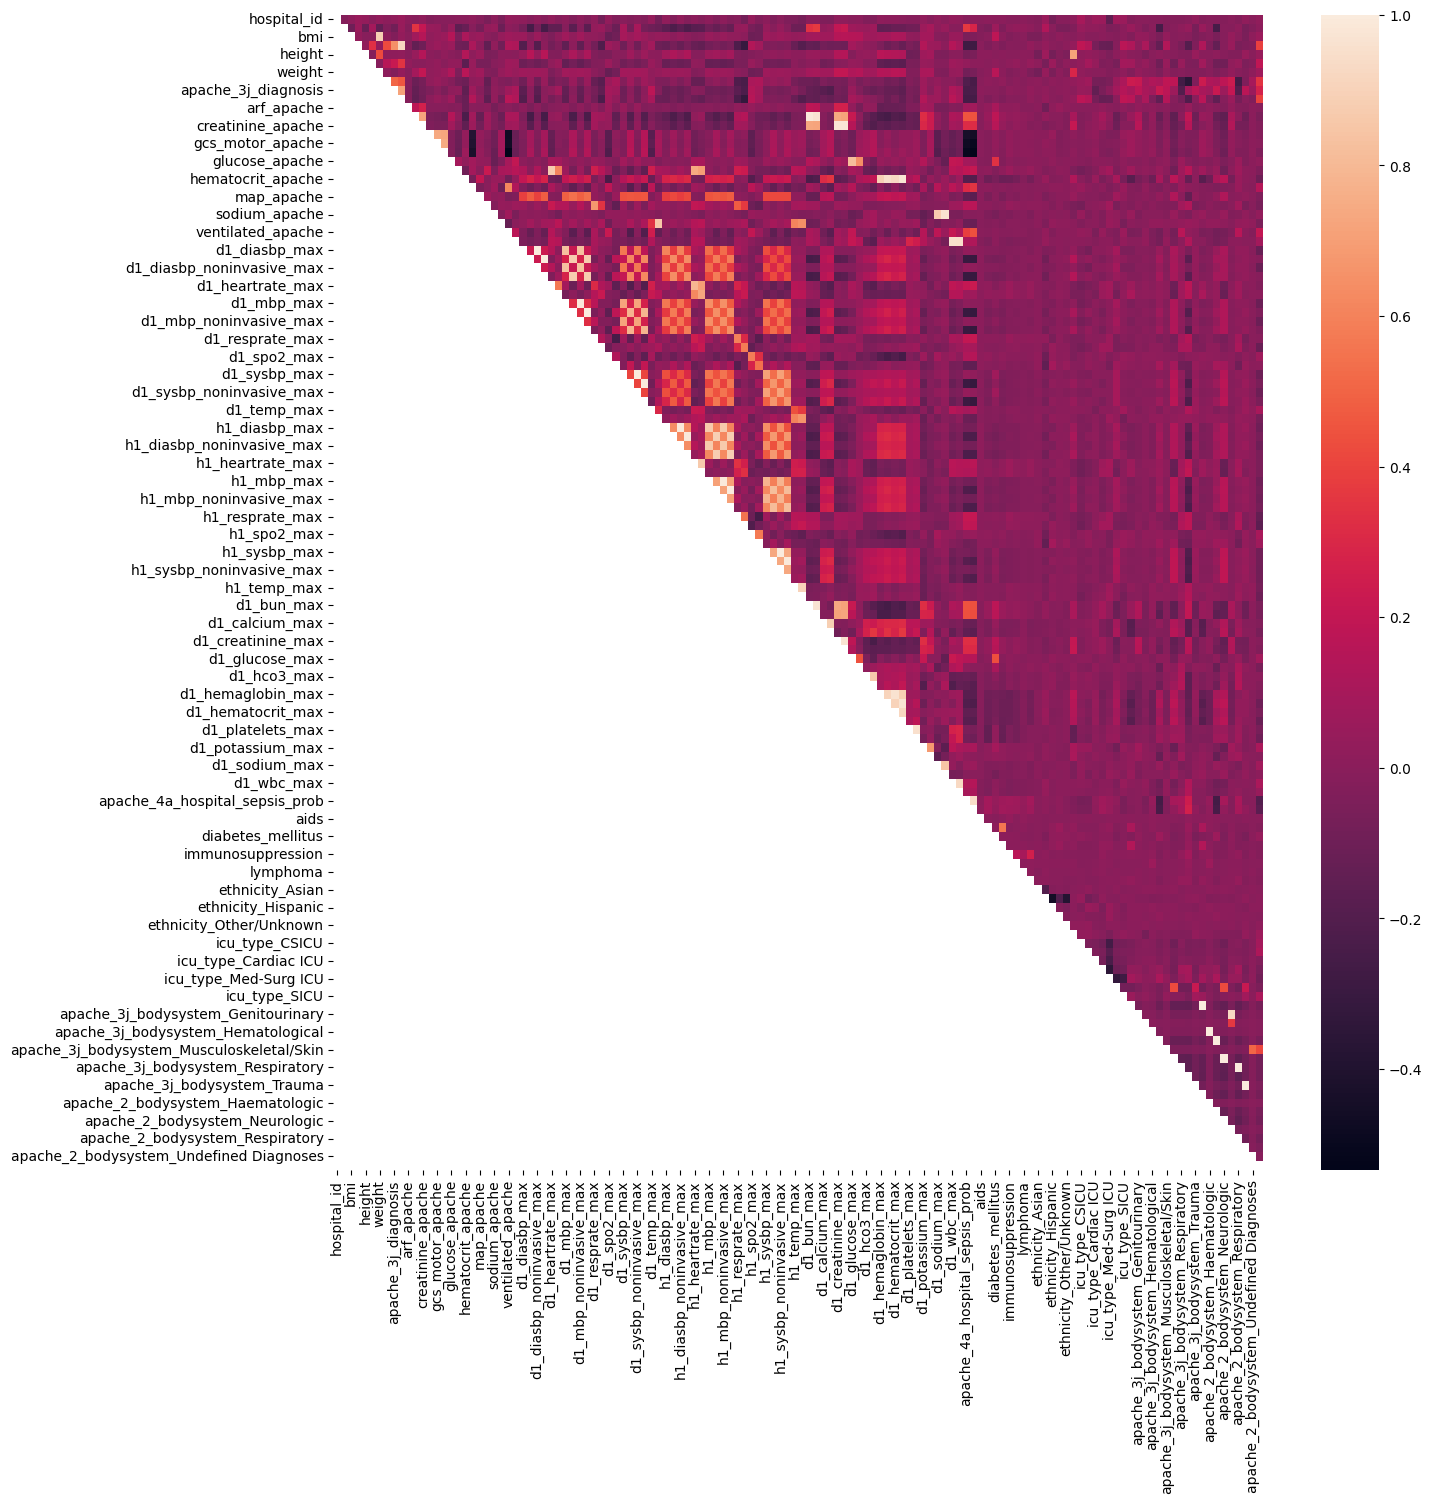

In [79]:
plt.figure(figsize=(15,15))
sns.heatmap(upper)
plt.show


In [80]:
pos_corr=[column for column in upper.columns if any(upper[column]>=0.85)]

In [81]:
neg_corr=[column for column in upper.columns if any(upper[column]<=-0.85)]

In [82]:
total_corr=pos_corr+neg_corr
total_corr

['weight',
 'apache_post_operative',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_sysbp_noninvasive_max',
 'h1_sysbp_noninvasive_min',
 'h1_temp_min',
 'd1_bun_max',
 'd1_bun_min',
 'd1_calcium_min',
 'd1_creatinine_max',
 'd1_creatinine_min',
 'd1_hco3_min',
 'd1_hemaglobin_max',
 'd1_hemaglobin_min',
 'd1_hematocrit_max',
 'd1_hematocrit_min',
 'd1_platelets_min',
 'd1_sodium_max',
 'd1_sodium_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'apache_4a_icu_sepsis_prob',
 'apache_2_bodysystem_Gastrointestinal',
 'apache_2_bodysystem_Haematologic',
 'apache_2_bodysystem_Metabolic',
 'apache_2_bodysystem_Neurologic',
 'apache_2_bodysystem_Renal/Genitourina

In [83]:
len(total_corr)

44

In [84]:
X1=X.drop(total_corr,axis=1)
X1.shape

(27795, 86)

In [85]:
#Hypothesis testing --- 
#the columns are normally distributed or not.
#confident interval , confidentce level
#Feature importance  

In [86]:
#scaling 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


In [87]:
X_scaled=scaler.fit_transform(X1)
X_scaled=pd.DataFrame(X_scaled,columns=X1.columns)
X_scaled.head()

hospital_id       age       bmi  elective_surgery    height  \
0     0.574257  0.712329  0.148859               0.0  0.738140   
1     0.391089  0.835616  0.237400               0.0  0.390478   
2     0.400990  0.698630  0.240043               0.0  0.912828   
3     0.574257  0.410959  0.207679               0.0  0.520637   
4     0.574257  0.972603  0.134394               0.0  0.738140   

   pre_icu_los_days  apache_2_diagnosis  apache_3j_diagnosis  arf_apache  \
0          0.011390            0.057971             0.190949         0.0   
1          0.017132            0.033816             0.048571         0.0   
2          0.003346            0.966184             0.143807         0.0   
3          0.003336            0.033816             0.048571         0.0   
4          0.078379            0.057971             0.190492         0.0   

   bun_apache  creatinine_apache  gcs_eyes_apache  gcs_motor_apache  \
0    0.219512           0.203125         0.666667               1.0   
1    0.040650           0.023897         0.000000               0.4   
2    0.073171           0.037684         1.000000               1.0   
3    0.089431           0.064338         0.000000               0.6   
4    0.073171           0.058824         0.666667               1.0   

   gcs_verbal_apache  glucose_apache  heart_rate_apache  hematocrit_apache  \
0               0.75        0.230481           0.594595           0.318182   
1               0.00        0.189387           0.608108           0.588068   
2               1.00        0.209041           0.560811           0.795455   
3               0.00        0.185814           0.567568           0.795455   
4               0.00        0.117920           0.466216           0.360795   

   intubated_apache  map_apache  resprate_apache  sodium_apache  temp_apache  \
0               0.0     0.00000         0.571429       0.414634     0.947368   
1               0.0     0.03750         0.517857       0.682927     0.394737   
2               0.0     0.56250         0.553571       0.487805     0.592105   
3               1.0     0.45625         0.535714       0.365854     0.565789   
4               0.0     0.58125         0.517857       0.707317     0.552632   

   ventilated_apache  wbc_apache  d1_diasbp_max  d1_diasbp_min  \
0                0.0    0.293987       0.184874       0.311688   
1                1.0    0.262806       0.411765       0.233766   
2                0.0    0.222717       0.453782       0.623377   
3                1.0    0.195991       0.361345       0.623377   
4                1.0    0.200445       0.352941       0.675325   

   d1_heartrate_min  d1_mbp_max  d1_resprate_max  d1_resprate_min  \
0          0.503497    0.233871         0.256410            0.250   
1          0.503497    0.483871         0.230769            0.300   
2          0.580420    0.540323         0.230769            0.250   
3          0.447552    0.427419         0.102564            0.225   
4          0.517483    0.508065         0.282051            0.400   

   d1_spo2_max  d1_spo2_min  d1_sysbp_max  d1_sysbp_min  d1_temp_max  \
0     1.000000         0.74      0.288732      0.268908     1.000000   
1     1.000000         0.70      0.485915      0.218487     0.250000   
2     0.965517         0.91      0.584507      0.554622     0.354167   
3     1.000000         0.88      0.556338      0.512605     0.416667   
4     1.000000         0.90      0.626761      0.739496     0.354167   

   h1_diasbp_max  h1_diasbp_min  h1_heartrate_max  h1_resprate_max  \
0       0.292453       0.450549          0.618644         0.326531   
1       0.226415       0.285714          0.576271         0.428571   
2       0.490566       0.736264          0.313559         0.040816   
3       0.490566       0.450549          0.406780         0.224490   
4       0.320755       0.472527          0.593220         0.530612   

   h1_resprate_min  h1_spo2_max  h1_spo2_min  h1_sysbp_max  h1_sysbp_min  \
0         0.152542     1.00000

In [88]:
# scaling after train _test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y,test_size=0.2,random_state=100,stratify=Y)

In [89]:
X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled

array([[0.92079208, 0.52054795, 0.49332142, ..., 0.        , 0.        ,
        0.        ],
       [0.06435644, 0.76712329, 0.13613581, ..., 0.        , 0.        ,
        0.        ],
       [0.96039604, 0.06849315, 0.13478957, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.48514851, 0.65753425, 0.43690658, ..., 0.        , 0.        ,
        0.        ],
       [0.33663366, 0.7260274 , 0.29200596, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.68493151, 0.2908625 , ..., 0.        , 0.        ,
        0.        ]])

In [90]:
X_test_scaled=scaler.transform(X_test)
X_test_scaled

array([[0.67326733, 0.76712329, 0.17203134, ..., 0.        , 0.        ,
        0.        ],
       [0.18811881, 0.87671233, 0.14430559, ..., 0.        , 0.        ,
        0.        ],
       [0.15346535, 0.79452055, 0.26392161, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.92079208, 0.46575342, 0.47267994, ..., 0.        , 0.        ,
        0.        ],
       [0.96039604, 0.76712329, 0.2296473 , ..., 0.        , 0.        ,
        0.        ],
       [0.78217822, 0.69863014, 0.16300549, ..., 0.        , 0.        ,
        0.        ]])

In [91]:
#import of algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [92]:
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
bg=BaggingClassifier()
svc=SVC()
knn=KNeighborsClassifier()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [93]:
for model in [dt,rf,bg]:
    print("##########"*3)
    print("Performance of model",model)
    print("##########"*3)
    
    xyz=model.fit(X_train_scaled,Y_train)
    y_pred=xyz.predict(X_test_scaled)
    cm=confusion_matrix(Y_test,y_pred)
    cr=classification_report(Y_test,y_pred)
    
    print("confusion matrix \n",cm)
    print("##########"*3)
    print("classification report\n",cr)
    

##############################
Performance of model DecisionTreeClassifier()
##############################
confusion matrix 
 [[4655  397]
 [ 313  194]]
##############################
classification report
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      5052
           1       0.33      0.38      0.35       507

    accuracy                           0.87      5559
   macro avg       0.63      0.65      0.64      5559
weighted avg       0.88      0.87      0.88      5559

##############################
Performance of model RandomForestClassifier()
##############################
confusion matrix 
 [[4991   61]
 [ 384  123]]
##############################
classification report
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5052
           1       0.67      0.24      0.36       507

    accuracy                           0.92      5559
   macro avg       0.80      0.62      

In [94]:
for model in [svc,knn]:
    print("##########"*3)
    print("Performance of model",model)
    print("##########"*3)
    
    xyz=model.fit(X_train_scaled,Y_train)
    y_pred=xyz.predict(X_test_scaled)
    cm=confusion_matrix(Y_test,y_pred)
    cr=classification_report(Y_test,y_pred)
    
    print("confusion matrix \n",cm)
    print("##########"*3)
    print("classification report\n",cr)
    

##############################
Performance of model SVC()
##############################
confusion matrix 
 [[5021   31]
 [ 421   86]]
##############################
classification report
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      5052
           1       0.74      0.17      0.28       507

    accuracy                           0.92      5559
   macro avg       0.83      0.58      0.62      5559
weighted avg       0.91      0.92      0.89      5559

##############################
Performance of model KNeighborsClassifier()
##############################
confusion matrix 
 [[5006   46]
 [ 433   74]]
##############################
classification report
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      5052
           1       0.62      0.15      0.24       507

    accuracy                           0.91      5559
   macro avg       0.77      0.57      0.60      5559
weight

In [95]:
# please apply all other algorithm
# hyperparameter tunning 
# check the model performance 

In [96]:
# feature selection --approach

In [97]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [98]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [108]:
param_dt={"criterion":["gini","entropy"],
         "max_depth":np.arange(10,150,10),
         "splitter":["best","random"],
         "max_features":["sqrt","log2"],
         "min_simples_split":[2,5,10]}

In [109]:
param_dt

{'criterion': ['gini', 'entropy'],
 'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140]),
 'splitter': ['best', 'random'],
 'max_features': ['sqrt', 'log2'],
 'min_simples_split': [2, 5, 10]}

In [110]:
dt=DecisionTreeClassifier(random_state=101)

In [111]:
random_cv_dt=RandomizedSearchCV(dt,param_dt,n_iter=100,cv=3,n_jobs=-1,verbose=1)

In [112]:
%%time
random_cv_dt.fit(X_train,Y_train)
print("Best parameters:\n")
print(random_cv_dt.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


ValueError: Invalid parameter 'min_simples_split' for estimator DecisionTreeClassifier(random_state=101, splitter='random'). Valid parameters are: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'].

In [113]:
for model in [svc,knn]:
    print("##########"*3)
    print("Performance of model",model)
    print("##########"*3)
    
    xyz=model.fit(X_train_scaled,Y_train)
    y_pred=xyz.predict(X_test_scaled)
    cm=confusion_matrix(Y_test,y_pred)
    cr=classification_report(Y_test,y_pred)
    
    print("confusion matrix \n",cm)
    print("##########"*3)
    print("classification report\n",cr)
    
    

##############################
Performance of model SVC()
##############################
confusion matrix 
 [[5021   31]
 [ 421   86]]
##############################
classification report
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      5052
           1       0.74      0.17      0.28       507

    accuracy                           0.92      5559
   macro avg       0.83      0.58      0.62      5559
weighted avg       0.91      0.92      0.89      5559

##############################
Performance of model KNeighborsClassifier()
##############################
confusion matrix 
 [[5006   46]
 [ 433   74]]
##############################
classification report
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      5052
           1       0.62      0.15      0.24       507

    accuracy                           0.91      5559
   macro avg       0.77      0.57      0.60      5559
weight

In [ ]:
# please apply the hyper parameter tunning (Grid search is fav) on different algorithm SVM,KNN.
Adaboost
gradient boost

In [115]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [116]:
bg.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

warm_start is a parameter in some machine learning models that allows the reuse of the solution of the previous call to fit as initialization. When warm_start is set to True, the existing fitted model attributes are used to initialize the new model in a subsequent call to fit. N ote that this is only applicable for some models and some parameters, and even some orders of parameter values.

In [117]:
# define the parameters

In [ ]:
# Balancing the dataset

In [ ]:
# WE ONLY BALANCE THE TRAINING DATA.

In [118]:
from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler,BorderlineSMOTE,SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss

In [119]:
over=RandomOverSampler()
under=RandomUnderSampler()

In [125]:
X_train_over,Y_train_over=over.fit_resample(X_train,Y_train)

In [121]:
X_train_under,Y_train_under=under.fit_resample(X_train,Y_train)

In [122]:
Y_train_over.value_counts()

0    20207
1    20207
Name: septic_shock, dtype: int64

In [123]:
Y_train.value_counts()

0    20207
1     2029
Name: septic_shock, dtype: int64

In [126]:
for model in [dt,rf,bg,random_cv_dt]:
    print("##########"*3)
    print("Performance of model",model)
    print("##########"*3)
    
    xyz=model.fit(X_train_over,Y_train_over)
    y_pred=xyz.predict(X_test)
    cm=confusion_matrix(Y_test,y_pred)
    cr=classification_report(Y_test,y_pred)
    
    print("confusion matrix \n",cm)
    print("##########"*3)
    print("classification report\n",cr)
    

##############################
Performance of model DecisionTreeClassifier(random_state=101)
##############################
confusion matrix 
 [[4705  347]
 [ 333  174]]
##############################
classification report
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      5052
           1       0.33      0.34      0.34       507

    accuracy                           0.88      5559
   macro avg       0.63      0.64      0.64      5559
weighted avg       0.88      0.88      0.88      5559

##############################
Performance of model RandomForestClassifier()
##############################
confusion matrix 
 [[4973   79]
 [ 379  128]]
##############################
classification report
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      5052
           1       0.62      0.25      0.36       507

    accuracy                           0.92      5559
   macro avg       0.77

ValueError: Invalid parameter 'min_simples_split' for estimator DecisionTreeClassifier(random_state=101, splitter='random'). Valid parameters are: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'].

In [127]:
# applying the model training on undersampling 

In [128]:
for model in [dt,rf,bg,random_cv_dt]:
    print("##########"*3)
    print("Performance of model",model)
    print("##########"*3)
    
    xyz=model.fit(X_train_under,Y_train_under)
    y_pred=xyz.predict(X_test)
    cm=confusion_matrix(Y_test,y_pred)
    cr=classification_report(Y_test,y_pred)
    
    print("confusion matrix \n",cm)
    print("##########"*3)
    print("classification report\n",cr)

##############################
Performance of model DecisionTreeClassifier(random_state=101)
##############################
confusion matrix 
 [[3531 1521]
 [ 145  362]]
##############################
classification report
               precision    recall  f1-score   support

           0       0.96      0.70      0.81      5052
           1       0.19      0.71      0.30       507

    accuracy                           0.70      5559
   macro avg       0.58      0.71      0.56      5559
weighted avg       0.89      0.70      0.76      5559

##############################
Performance of model RandomForestClassifier()
##############################
confusion matrix 
 [[3938 1114]
 [ 104  403]]
##############################
classification report
               precision    recall  f1-score   support

           0       0.97      0.78      0.87      5052
           1       0.27      0.79      0.40       507

    accuracy                           0.78      5559
   macro avg       0.62

ValueError: Invalid parameter 'min_simples_split' for estimator DecisionTreeClassifier(random_state=101). Valid parameters are: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'].